In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import holidays

### Importazione dataframe

In [2]:
df1 = pd.read_csv('C:/Users/HP/Desktop/PLC_gualchierani/monitorconi_23mar_to_29mar.csv')
df2 = pd.read_csv('C:/Users/HP/Desktop/PLC_gualchierani/monitorconi_30mar_to_4apr.csv')
df3 = pd.read_csv('C:/Users/HP/Desktop/PLC_gualchierani/monitorconi_5apr_to_11apr.csv')
df4 = pd.read_csv('C:/Users/HP/Desktop/PLC_gualchierani/monitorconi_12apr_to_18apr.csv')
df5 = pd.read_csv('C:/Users/HP/Desktop/PLC_gualchierani/monitorconi_19apr_to_25apr.csv')
df6 = pd.read_csv('C:/Users/HP/Desktop/PLC_gualchierani/monitorconi_26apr_to_2mag.csv')

In [3]:
df1["measured_at"] = pd.to_datetime( df1["measured_at"] )
df2["measured_at"] = pd.to_datetime( df2["measured_at"] )
df3["measured_at"] = pd.to_datetime( df3["measured_at"] )
df4["measured_at"] = pd.to_datetime( df4["measured_at"] )
df5["measured_at"] = pd.to_datetime( df5["measured_at"] )
df6["measured_at"] = pd.to_datetime( df6["measured_at"] )

In [4]:
# da mezzanotte del 23/03 alle 23.59 del 29/03
mask_30mar = np.asarray( df1[ df1['measured_at'].dt.day == 30].index )
df1.drop( mask_30mar, inplace = True )

# da mezzanotte del 30/03 alle 23.59 del 4/04
mask_29mar = np.asarray( df2[ df2['measured_at'].dt.day == 29].index )
df2.drop( mask_29mar, inplace = True )

mask_5apr = np.asarray( df2[ df2['measured_at'].dt.day == 5].index )
df2.drop( mask_5apr, inplace = True )

# da mezzanotte del 5/04 alle 23.59 del 11/04
mask_4apr = np.asarray( df3[ df3['measured_at'].dt.day == 4].index )
df3.drop( mask_4apr, inplace = True )

mask_12apr = np.asarray( df3[ df3['measured_at'].dt.day == 12].index )
df3.drop( mask_12apr, inplace = True )

# da mezzanotte del 12/04 alle 23.59 del 18/04
mask_11apr = np.asarray( df4[ df4['measured_at'].dt.day == 11].index )
df4.drop( mask_11apr, inplace = True )

mask_19apr = np.asarray( df4[ df4['measured_at'].dt.day == 19].index )
df4.drop( mask_19apr, inplace = True )

# da mezzanotte del 19/04 alle 23.59 del 25/04
mask_18apr = np.asarray( df5[ df5['measured_at'].dt.day == 18].index )
df5.drop( mask_18apr, inplace = True )

mask_26apr = np.asarray( df5[ df5['measured_at'].dt.day == 26].index )
df5.drop( mask_26apr, inplace = True )

# da mezzanotte del 26/04 alle 23.59 del 2/05
mask_25apr = np.asarray( df6[ df6['measured_at'].dt.day == 25].index )
df6.drop( mask_4apr, inplace = True )

mask_3mag = np.asarray( df6[ df6['measured_at'].dt.day == 3].index )
df6.drop( mask_12apr, inplace = True )

# unisco i dataframe
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [5]:
df.drop(['id', 'tipologia_lavorazione', 'cicli_da_eseguire',
        'cicli_eseguiti', 'tempo_miscelazione_eseguito',
        'stato_tramoggia', 'tara_cono', 'lotto',
        'created_at', 'updated_at','estrusore_destinazione', 'tempo_miscelazione_richiesto',
        'destinazione_ritorno'], axis=1, inplace=True)

In [6]:
mask_no_cono = np.asarray( df[ df['id_cono'] > 24 ].index )
df.drop( mask_no_cono, inplace = True )

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176343 entries, 0 to 595703
Data columns (total 6 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   id_cono                           1176343 non-null  int64         
 1   ubicazione                        1176343 non-null  int64         
 2   stato                             1176343 non-null  int64         
 3   postazione_pesatura_destinazione  1176343 non-null  int64         
 4   miscelatore_destinazione          1176343 non-null  int64         
 5   measured_at                       1176343 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 62.8 MB


### Calcolo ore lavorative

In [9]:
dates = np.asarray(df['measured_at'].dt.date.unique())
it_holidays = holidays.Italy()
shift = 0 #  ho tolto sabato di pasqua e venerdì santo

In [10]:
for date in dates:
    if it_holidays.get(date) is None:
        if date.weekday() < 5:
            shift += 3
        elif date.weekday() == 5:
            shift += 2
        else:
            pass
    else:
        print(it_holidays.get(date))

Pasqua di Resurrezione
Lunedì dell'Angelo
Festa della Liberazione
Festa dei Lavoratori


In [11]:
shift

96

### Preparazione dati di supporto

In [12]:
buffer = [n for n in range(21, 29)]
buffer.extend([n for n in range(31, 39)])

legenda_gualchierani = {
    'fuori_impianto': [0],
    'ing_zona_misc': [1],
    'catenaria_ing_misc': [45, 46],
    'navetta_serv_misc': [43],
    'pesatura': [41, 42],
    'miscelatore': [2, 8],
    'cat_usc_pieni': [3],
    'nav_serv_carr_pieni': [4],
    'nav_serv_carr_vuoti': [5],
    'buffer': buffer,
    'carroponte_1': [6],
    'carroponte_2': [7],
    'estrusore': [n for n in range(11, 19)],
    'handling_post_est': [6, 5, 4],
    'catenaria_vuoti': [47, 48],
    'catenaria_uscita_vuoti': [49],
    'pinza_vuoti': [50],
    'catenaria_parcheggi': [n for n in range(51, 58)],
    'nav_serv_parcheggi': [44],
    'manuale': [68, 70]
}

dict_states = {
    0: 'Not_def',
    1: 'V_per_park',
    2: 'P_da_misc',
    3: 'P_da_est',
    4: 'P_remove',
    5: 'P_recheck',
    6: 'P_per_park',
    7: 'V_da_pes',
    8: 'V_remove',
    9: 'V_lavaggio'
}

starter = ['V_da_pes/nav_serv_carr_pieni', 'V_da_pes/nav_serv_carr_vuoti',
'V_da_pes/catenaria_vuoti', 'V_da_pes/catenaria_parcheggi',
'V_da_pes/nav_serv_parcheggi', 'V_da_pes/catenaria_ing_misc',
'V_da_pes/ing_zona_misc']

finisher = ['P_da_est/estrusore', 'Not_def/fuori_impianto']

finisher2 = ['V_per_park/estrusore', 'V_da_pes/estrusore', 'Not_def/fuori_impianto']

### Preparazione funzioni

In [13]:
#  questa funzione estrae dal df il primo record in ordine temporale per ogni ubicazione

def create_df_t_new(df, cono_in_esame):
    mask = df['id_cono'] == cono_in_esame
    df1 = df[mask]

    ubicazione = []
    stato = []
    timestamp = []
    stazione = []
    miscelatore = []
    for i in range(1, len(df1) - 1):
        if df1.iloc[i, 1] in legenda_gualchierani['pesatura']:
            if (df1.iloc[i, 1] != df1.iloc[i - 1, 1]) or (df1.iloc[i, 1] != df1.iloc[i + 1, 1]):
                ubicazione.append(df1.iloc[i, 1])
                stato.append(df1.iloc[i, 2])
                timestamp.append(df1.iloc[i, 5])
                stazione.append(df1.iloc[i, 3])
                miscelatore.append(df1.iloc[i, 4])
        elif df1.iloc[i, 1] in legenda_gualchierani['miscelatore']:
            if (df1.iloc[i, 1] != df1.iloc[i - 1, 1]) or (df1.iloc[i, 1] != df1.iloc[i + 1, 1]):
                ubicazione.append(df1.iloc[i, 1])
                stato.append(df1.iloc[i, 2])
                timestamp.append(df1.iloc[i, 5])
                stazione.append(df1.iloc[i, 3])
                miscelatore.append(df1.iloc[i, 4])
        else:
            continue

#  estrae i valori dalla memoria del PLC li traduco in parole
    for i in range(len(ubicazione)):
        for k,v in legenda_gualchierani.items():
            if ubicazione[i] in v:
                ubicazione[i] = k

    for i in range(len(stato)):
        stato[i] = dict_states[stato[i]]

#  crea il dataframe che sarà input alla funzione di individuazione della tracce
    df_t = pd.DataFrame(list(zip(stato, ubicazione, timestamp, stazione, miscelatore)),
                        columns =['stato', 'ubicazione', 'timestamp', 'stazione', 'miscelatore'])
    df_t.sort_values('timestamp', inplace=True)
    df_t['rif'] = (df_t.stato.astype('str') + '/' + df_t.ubicazione.astype('str'))
    df_t.drop_duplicates(inplace=True)
    return(df_t)

In [14]:
df

,id_cono,ubicazione,stato,postazione_pesatura_destinazione,miscelatore_destinazione,measured_at
0,1,43,3,2,2,2022-03-23 00:00:29
1,2,0,0,1,1,2022-03-23 00:00:29
2,3,14,3,2,1,2022-03-23 00:00:29
3,4,0,0,2,2,2022-03-23 00:00:29
4,5,0,2,2,1,2022-03-23 00:00:29
...,...,...,...,...,...,...
595699,20,0,0,2,1,2022-05-03 21:22:32
595700,21,0,0,1,1,2022-05-03 21:22:32
595701,22,2,3,2,1,2022-05-03 21:22:32
595702,23,16,1,1,2,2022-05-03 21:22:32


### Calcolo tracce

In [15]:
trace = 0
for c in range(1, 25):
    start = datetime.now()
    if c == 1:
        df_pes = create_df_t_new(df, c)
    else:
        df_pes = pd.concat([df_pes, create_df_t_new(df, c)])
    end = datetime.now()
    print('TEMPO ELABORAZIONE CONO {} {}'.format(c, end-start))

TEMPO ELABORAZIONE CONO 1 0:00:08.147891
TEMPO ELABORAZIONE CONO 2 0:00:07.172303
TEMPO ELABORAZIONE CONO 3 0:00:07.577979
TEMPO ELABORAZIONE CONO 4 0:00:10.312192
TEMPO ELABORAZIONE CONO 5 0:00:13.971871
TEMPO ELABORAZIONE CONO 6 0:00:09.126034
TEMPO ELABORAZIONE CONO 7 0:00:07.071288
TEMPO ELABORAZIONE CONO 8 0:00:06.494707
TEMPO ELABORAZIONE CONO 9 0:00:05.305745
TEMPO ELABORAZIONE CONO 10 0:00:05.953418
TEMPO ELABORAZIONE CONO 11 0:00:08.327139
TEMPO ELABORAZIONE CONO 12 0:00:03.234335
TEMPO ELABORAZIONE CONO 13 0:00:04.546720
TEMPO ELABORAZIONE CONO 14 0:00:04.235385
TEMPO ELABORAZIONE CONO 15 0:00:03.249394
TEMPO ELABORAZIONE CONO 16 0:00:04.624891
TEMPO ELABORAZIONE CONO 17 0:00:05.250287
TEMPO ELABORAZIONE CONO 18 0:00:08.428452
TEMPO ELABORAZIONE CONO 19 0:00:10.716766
TEMPO ELABORAZIONE CONO 20 0:00:09.436768
TEMPO ELABORAZIONE CONO 21 0:00:12.064253
TEMPO ELABORAZIONE CONO 22 0:00:09.797287
TEMPO ELABORAZIONE CONO 23 0:00:12.351325
TEMPO ELABORAZIONE CONO 24 0:00:14.932749


In [16]:
df_pes.reset_index(drop=True, inplace=True)
df_pes['ID'] = 0
idu = 0
for i in df_pes.index:
    if (df_pes.loc[i, 'rif'] == 'V_da_pes/pesatura' and df_pes.loc[i + 1, 'rif'] == 'P_da_misc/pesatura'):
        df_pes.loc[i, 'ID'] = idu
        df_pes.loc[i + 1, 'ID'] = idu
        idu += 1
        continue
    if (df_pes.loc[i, 'rif'] == 'P_da_misc/miscelatore' and df_pes.loc[i + 1, 'rif'] == 'P_da_est/miscelatore'):
        df_pes.loc[i, 'ID'] = idu
        df_pes.loc[i + 1, 'ID'] = idu
        idu += 1
        continue
        

In [38]:
df_pes

,stato,ubicazione,timestamp,stazione,miscelatore,rif,ID
0,V_da_pes,pesatura,2022-03-23 01:54:52,2,2,V_da_pes/pesatura,0
1,P_da_misc,pesatura,2022-03-23 02:10:19,2,1,P_da_misc/pesatura,0
2,P_da_misc,miscelatore,2022-03-23 02:11:28,2,1,P_da_misc/miscelatore,1
3,P_da_est,miscelatore,2022-03-23 02:14:19,2,1,P_da_est/miscelatore,1
4,V_da_pes,pesatura,2022-03-23 04:22:27,2,1,V_da_pes/pesatura,2
...,...,...,...,...,...,...,...
9027,P_da_est,miscelatore,2022-05-03 19:40:07,2,2,P_da_est/miscelatore,3097
9028,V_da_pes,pesatura,2022-05-03 20:40:46,1,2,V_da_pes/pesatura,3098
9029,P_da_misc,pesatura,2022-05-03 20:51:38,1,2,P_da_misc/pesatura,3098
9030,P_da_misc,miscelatore,2022-05-03 20:52:47,1,2,P_da_misc/miscelatore,3099


In [17]:
staz_1 = []
staz_2 = []
misc_1 = []
misc_2 = []

for i in df_pes['ID'].unique():
    df_tmp = df_pes[ df_pes['ID'] == i ]
    df_tmp.reset_index(inplace=True, drop=True)
    dt = df_tmp.loc[1, 'timestamp'] - df_tmp.loc[0, 'timestamp']
    
    if df_tmp.loc[0, 'ubicazione'] == 'pesatura':
        if df_tmp.loc[0, 'stazione'] == 1:
            staz_1.append(dt)
        else:
            staz_2.append(dt)
    elif df_tmp.loc[0, 'ubicazione'] == 'miscelatore':
        if df_tmp.loc[0, 'miscelatore'] == 1:
            misc_1.append(dt)
        else:
            misc_2.append(dt)

In [18]:
staz_1.sort()
staz_2.sort()
misc_1.sort()
misc_2.sort()

del misc_2[0]

In [19]:
print('Tempo medio di dosatura stazione 1: ', np.mean(staz_1))
print('Tempo medio di dosatura stazione 2: ', np.mean(staz_2))
print('Tempo medio di miscelatore 1: ', np.mean(misc_1))
print('Tempo medio di miscelatore 2: ', np.mean(misc_2))

Tempo medio di dosatura stazione 1:  0 days 00:19:41.553846153
Tempo medio di dosatura stazione 2:  0 days 00:09:59.708406304
Tempo medio di miscelatore 1:  0 days 00:03:25.503717472
Tempo medio di miscelatore 2:  0 days 00:04:14.014304291


In [20]:
tot_staz_1 = sum([x.total_seconds() / 60 for x in staz_1])
tot_staz_2 = sum([x.total_seconds() / 60 for x in staz_2])
tot_misc_1 = sum([x.total_seconds() / 60 for x in misc_1])
tot_misc_2 = sum([x.total_seconds() / 60 for x in misc_2])

tot_staz = tot_staz_1 + tot_staz_2
tot_misc = tot_misc_1 + tot_misc_2

In [21]:
print('Saturazione stazione 1 su tot stazioni: ', tot_staz_1 / tot_staz * 100, '%')
print('Saturazione stazione 2 su tot stazioni: ', tot_staz_2 / tot_staz * 100, '%')
print('Saturazione miscelatore 1 su tot miscelatori: ', tot_misc_1 / tot_misc * 100, '%')
print('Saturazione miscelatore 2 su tot miscelatori: ', tot_misc_2 / tot_misc * 100, '%')

Saturazione stazione 1 su tot stazioni:  52.86132274101659 %
Saturazione stazione 2 su tot stazioni:  47.13867725898341 %
Saturazione miscelatore 1 su tot miscelatori:  36.14309344945038 %
Saturazione miscelatore 2 su tot miscelatori:  63.85690655054961 %


In [34]:
tot_h = shift * 7.5
tot_min = tot_h * 60

In [35]:
print('Saturazione stazione 1: ', tot_staz_1 / tot_min * 100, '%')
print('Saturazione stazione 2: ', tot_staz_2 / tot_min * 100, '%')
print('Saturazione miscelatore 1: ', tot_misc_1 / tot_min * 100, '%')
print('Saturazione miscelatore 2: ', tot_misc_2 / tot_min * 100, '%')

Saturazione stazione 1:  29.630015432098794 %
Saturazione stazione 2:  26.422337962963017 %
Saturazione miscelatore 1:  4.26547067901236 %
Saturazione miscelatore 2:  7.536149691358078 %


In [36]:
coni_h = len(df_pes[df_pes['rif'] == 'V_da_pes/pesatura']) / tot_h
coni_day = int(coni_h * 24)

In [41]:
len(df_pes[df_pes['rif'] == 'V_da_pes/pesatura'])

2486

In [43]:
96*7.5

720.0

In [37]:
print('Coni dosati per ora: ', coni_h)
print('Coni dosati per giorno: ', coni_day)

Coni dosati per ora:  3.452777777777778
Coni dosati per giorno:  82


### Calcolo tempi di interarrivo

In [26]:
df_int = df_pes[df_pes['rif'] == 'V_da_pes/pesatura']

In [27]:
df_int.sort_values('timestamp', inplace=True)
df_int.reset_index(drop=True, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6640\2492631638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int.sort_values('timestamp', inplace=True)


In [28]:
intervals = []

for i in range(len(df_int) - 1):
    time_delta = df_int.loc[i + 1, 'timestamp'] - df_int.loc[i, 'timestamp']
    dt = time_delta.total_seconds() / 60
    intervals.append(dt)

In [29]:
len(intervals) / tot_h

3.2356770833333335

In [30]:
from fitter import Fitter, get_common_distributions, get_distributions
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
def quantile2(column,pct,pct_lower):
    y = column
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    return y

In [31]:
intervals = quantile2(intervals,0.999,0)

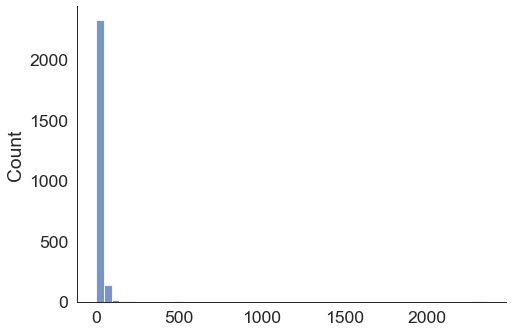

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=intervals, kind="hist", bins = 50, aspect = 1.5)

In [33]:
#  extract best fitting distribution
f = Fitter(intervals)
f.fit()
f.summary()


KeyboardInterrupt



In [ ]:
f.get_best(method = 'sumsquare_error')